In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
    )

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
    )

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
    )

Found 359 files belonging to 36 classes.


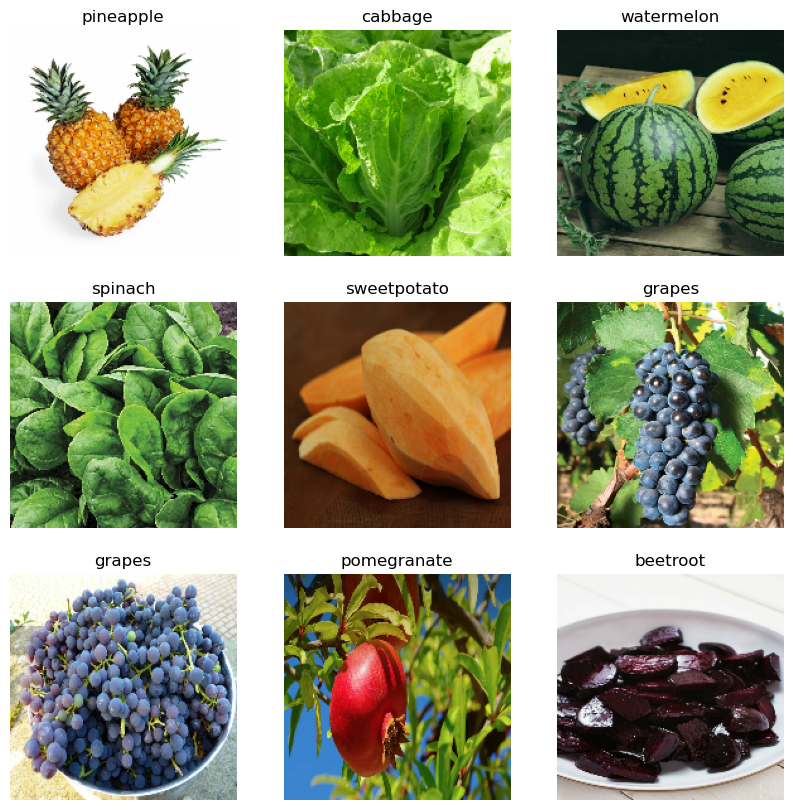

In [9]:
plt.figure(figsize = (10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
epoch_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epoch_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 570ms/step - accuracy: 0.0525 - loss: 4.0810 - val_accuracy: 0.3362 - val_loss: 2.4460
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 620ms/step - accuracy: 0.2502 - loss: 2.6204 - val_accuracy: 0.5840 - val_loss: 1.5988
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - accuracy: 0.4175 - loss: 2.0273 - val_accuracy: 0.7236 - val_loss: 1.0505
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 573ms/step - accuracy: 0.5684 - loss: 1.4726 - val_accuracy: 0.8490 - val_loss: 0.7536
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 579ms/step - accuracy: 0.7023 - loss: 1.0208 - val_accuracy: 0.8746 - val_loss: 0.6344
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 584ms/step - accuracy: 0.7831 - loss: 0.7473 - val_accuracy: 0.9060 - val_loss: 0.5566
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 618ms/step - accuracy: 0.8838 - loss: 0.4326 - val_accuracy: 0.9231 - val_loss: 0.6103
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9153 - loss: 0.3209 - val_accura

Text(0.5, 1.0, 'Loss')

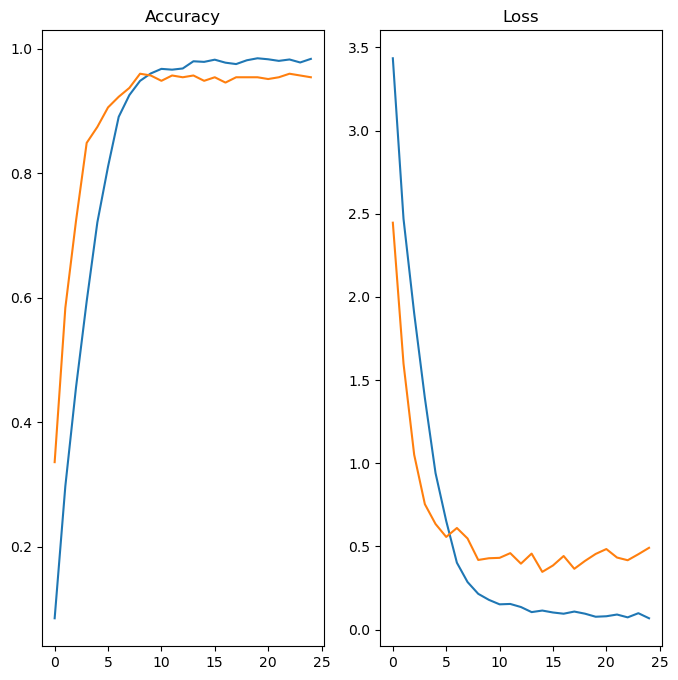

In [13]:
epochs_range = range(epoch_size)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [14]:
image = 'apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [ ]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 100.00


In [ ]:
model.save('Image_Classification.keras')